
# ARIMA e Seasonal ARIMA


## (Seasonal) Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualização dos dados da Time Series (TS)
* Tornar os dados estacionários
* Plot dos gráficos de Correlação e AutoCorrelação
* Construção dos modelos ARIMA e Seasonal ARIMA
* Utilização dos modelos para realizar predições

crédito: https://machinelearningmastery.com/introduction-to-time-series-forecasting-with-python/;
https://github.com/krishnaik06

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

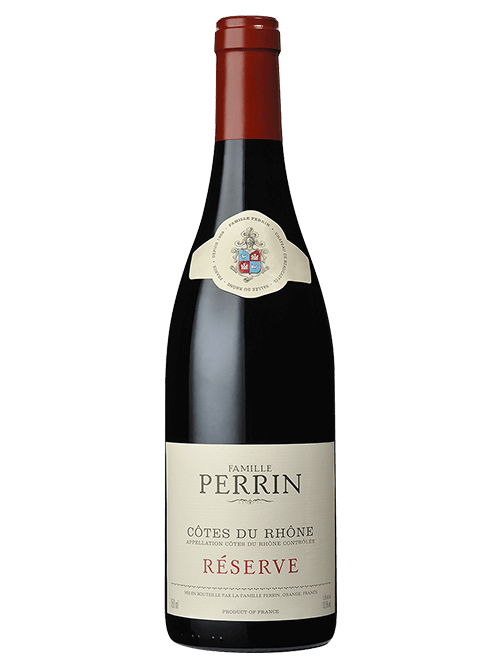

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

## Análise Exploratória

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


## Limpeza dos dados

In [5]:
df.columns=["Mes","Vendas"]
df.head()

,Mes,Vendas
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
## Drop últimas duas colunas
df.drop(106,axis=0,inplace=True)

In [7]:
df.tail()

,Mes,Vendas
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [8]:
df.drop(105,axis=0,inplace=True)

In [9]:
df.tail()

,Mes,Vendas
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mes     105 non-null    object 
 1   Vendas  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


## Conversão dos dados do mês para datetime

In [11]:
# Convert Month into Datetime
df['Mes']=pd.to_datetime(df['Mes'])

In [12]:
df.head()

,Mes,Vendas
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


## Definição do mês como índice dos dados

In [13]:
df.set_index('Mes',inplace=True)

In [14]:
df.head()

,Vendas
Mes,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [15]:
df.describe()

,Vendas
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Visualização dos dados

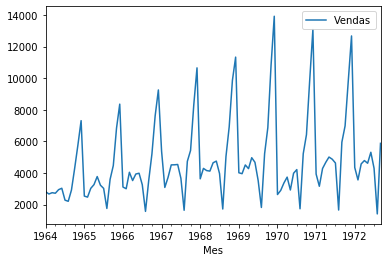

In [16]:
df.plot()

## Verificação de estacionariedade
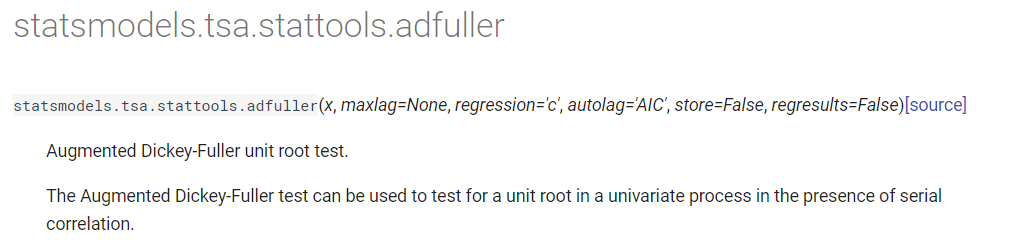
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [17]:
### Utilização do modelo adfuller do Statsmodels
from statsmodels.tsa.stattools import adfuller

In [18]:
test_result=adfuller(df['Vendas'])

In [19]:
#Ho: Não é estacionário
#H1: É estacionário

def adfuller_test(Vendas):
    result=adfuller(Vendas)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [20]:
adfuller_test(df['Vendas'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Diferenciação

In [21]:
df['Diferenca Vendas'] = df['Vendas'] - df['Vendas'].shift(1)

In [22]:
df['Vendas'].shift(1)

Mes
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Vendas, Length: 105, dtype: float64

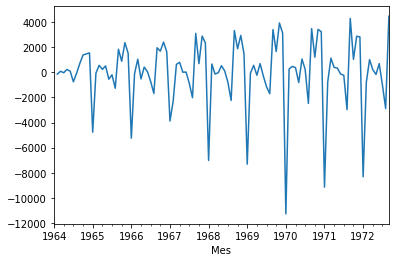

In [24]:
df['Diferenca Vendas'].plot()

In [23]:
adfuller_test(df['Diferenca Vendas'].dropna())

ADF Test Statistic : -7.1898964480510195
p-value : 2.519620447386778e-10
#Lags Used : 11
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Diferenciação Sazonal

In [25]:
df['Seasonal First Difference']=df['Vendas']-df['Vendas'].shift(12)

In [26]:
df.head(14)

,Vendas,Diferenca Vendas,Seasonal First Difference
Mes,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [27]:
## Repetimos o teste, agora com a Diferenciação Sazonal
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


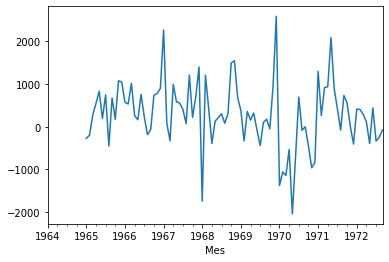

In [28]:
df['Seasonal First Difference'].plot()

## Modelo Auto Regressivo
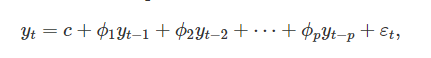

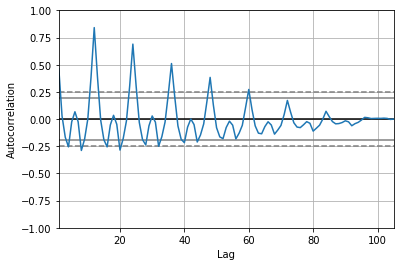

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Vendas'])
plt.show()

### Sugestões em relação a ACF e PACF

* Identificação do valor de AR é normalmente feito pelo PACF.
    * Num modelo regressivo o PACF "desliga" após a janela decidida. 
    
    
* Identificação do valor de MA é normalmente feito pelo ACF.
    * Num modelo de média móvel o valor de PACF não "some", mas vai diminuindo e normalmente chega a zero. Os valores não nulos implicam em todos os intervalos que interagem com a média móvel.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

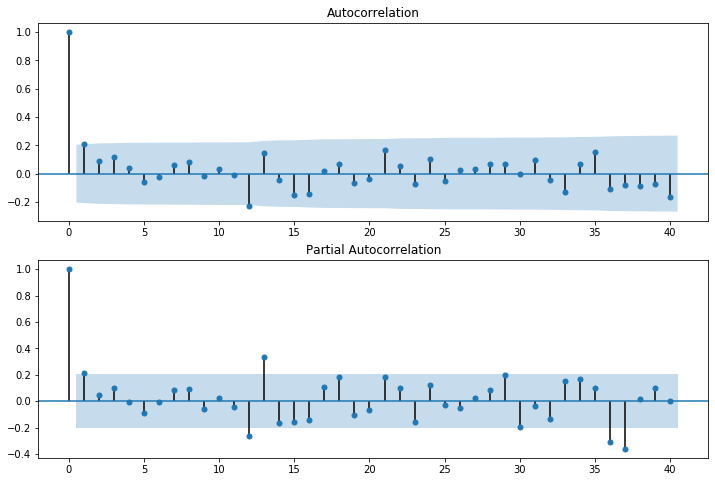

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [32]:
# para dados não sazonais
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [33]:
model=ARIMA(df['Vendas'],order=(1,1,1))
model_fit=model.fit()

C:\Users\afilg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\afilg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Vendas   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Fri, 12 Jun 2020   AIC                           1910.251
Time:                        11:12:04   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             22.7829     12.405      1.837      0.066      -1.531      47.097
ar.L1.D.Vendas     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Vendas    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

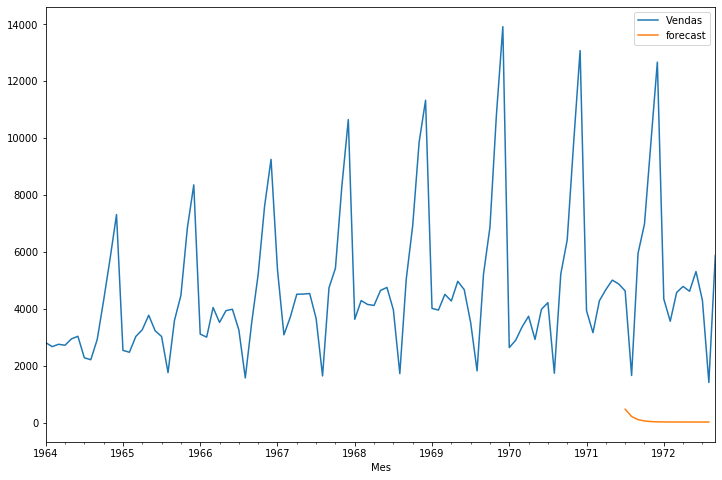

In [35]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Vendas','forecast']].plot(figsize=(12,8))

In [36]:
import statsmodels.api as sm

In [37]:
model=sm.tsa.statespace.SARIMAX(df['Vendas'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\afilg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\afilg\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


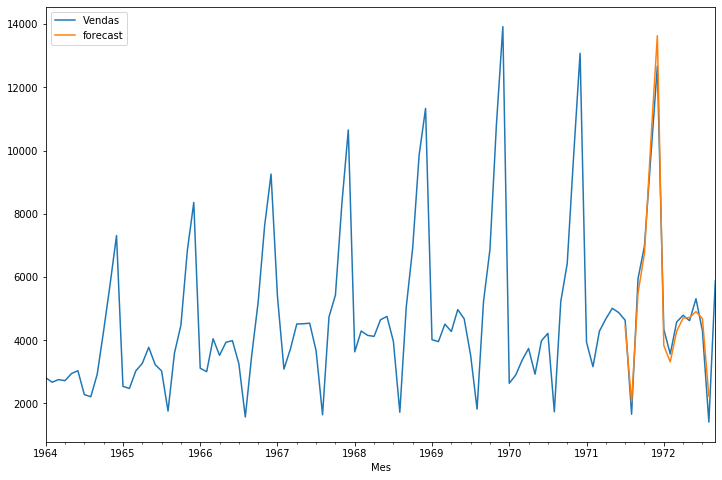

In [38]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Vendas','forecast']].plot(figsize=(12,8))

In [39]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [40]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [41]:
future_datest_df.tail()

,Vendas,Diferenca Vendas,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [42]:
future_df=pd.concat([df,future_datest_df])

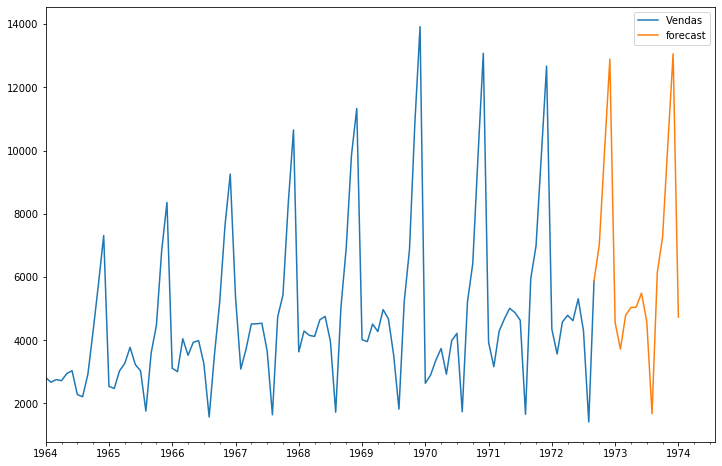

In [43]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Vendas', 'forecast']].plot(figsize=(12, 8)) 